# Megan's Summer 2017 Notebook

Hello! This is my notebook for the summer where I will record everything I learned and what I worked on. I am going to try to log in it every day, but I make no promises!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Monday 05/22/17

Today was the first day of the summer! Most of the day was introductory information laced with Dr. Moustakas' sassafrass. I think our research group has a really fun vibe to it and I am excited for the rest of the summer!

In the morning, we started on the tutorials on the siena-astrophysics github page (https://github.com/moustakas/siena-astrophysics). I spent most of my time on the Programming with Python tutorial because it was a much needed review of the material covered in CSIS 200. I hope to get to more of the tutorials from Software Carpentry this week, especially the Unix tutorial.

In the afternoon, I began NSF training, which was interesting. Then Dr. Moustakas guided us in creating this notebook and uploading it to GitHub.

:)

In [2]:
# Here's a fun graph we made! Its supposed to be Gaussian noise

n = 50
x = np.linspace(0, 100, n)
slope = 3.14
yint = 0
y = slope * x**2 + yint

In [3]:
# Let's add some uncertainty!
yuncertainty = y + np.random.normal(scale=0.05 * y, size = n)

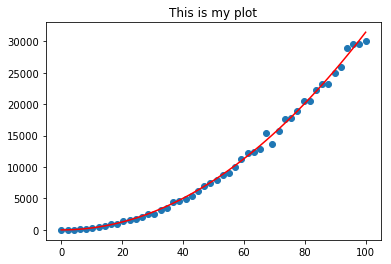

In [4]:
plt.figure()
plt.scatter(x, yuncertainty)

fit = np.polyfit(x, yuncertainty, 2)
# print(fit)

plt.plot(x, (x**2)*fit[0] + fit[1], 'r') # Thanks Coley!!
plt.title('This is my plot')

## Tuesday 05/23/17

Today I began the day by wrapping up the NSF training. I started looking into the Unix tutorial, but realized I actually had a pretty good grip on most of the content, so I read what I didn't know and moved on. Then, I finished fitting the plot from yesterday with some help from Coley. Because you can never have enough practice, I plotted another graph below.

The afternoon was spent reading various papers and catching up Coley on the project I have been working on with Dr. Moustakas this past semester (spring 2017).


In [5]:
n = 27
x = np.linspace(0, 45, n)
m = 82
b = 17
y = m * x + b

yuncertainty = y + np.random.normal(scale=0.07 * y, size=n)

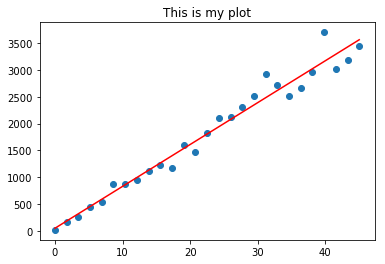

In [6]:
plt.figure()
plt.scatter(x, yuncertainty)

fit = np.polyfit(x, yuncertainty, 1)
# print(fit)

plt.plot(x, x * fit[0] + fit[1], 'r')
plt.title('This is my plot')

## Wednesday 05/24/17

This morning, I began exploring the Practical Python for Astronomers webpage (below are a couple of plots I made from the tutorial). I also began reading *Stellar Mass – Halo Mass Relation and Star Formation Efficiency in High-Mass Halos*, Kravtsov et al. 2014, Astrophysical Journal, submitted (arXiv:1401.7329), pp 1-17 https://arxiv.org/pdf/1401.7329.pdf. Then, we all discussed astrophysics with Dr. Moustakas. Then, I discovered an issue with the python environment that *even Kevin could not solve*. Basically, the environment I was woring on last semester (sienaconda27) was changed to py27, but the kernel kept dying in py27 and the terminal would abort. It also didn't work in py35. I repeat, KEVIN COULD NOT FIGURE OUT WHAT WAS WRONG.

In the afternon, Coley and I sat in on a TeleCon with Dr. Moustakas for a few minutes, which was very interesting. I had never thought of using Google Hangout for collaboration on scietific projects. Then we started working on the interactive demo on the Prospector Github page (https://github.com/bd-j/prospector) and were making a lot of progress until we weren't. There are a few errors regaurding the code accessing files and imports. Beyond the errors though, we understood what each step was doing, which is the main goal of doing the demo. After we could no longer make progress due to too many errors, I worked on the Emcee tutorial (http://dan.iel.fm/emcee/current/user/line/).

In [7]:
# imports + reading in files
from astropy.extern.six.moves.urllib import request
import tarfile
url = 'http://python4astronomers.github.io/_downloads/core_examples.tar'
tarfile.open(fileobj=request.urlopen(url), mode='r|').extractall()
%ls py4ast/core

from astropy.io import fits
hdus = fits.open('py4ast/core/3c120_stis.fits.gz')
hdus

3c120_stis.fits.gz  imgview.py


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff0b0ebd320>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff0b0ed4a20>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff0b0e627f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff0b0e709b0>]

In [8]:
#hdus?

primary = hdus[0].data  # Primary (NULL) header data unit
img = hdus[1].data      # Intensity data
err = hdus[2].data      # Error per pixel
dq = hdus[3].data       # Data quality per pixel

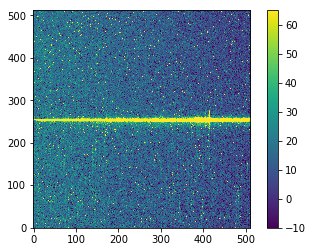

In [9]:
plt.imshow(img)

plt.clf()
plt.imshow(img, origin = 'lower', vmin = -10, vmax = 65)
plt.colorbar()

In [10]:
#img?
#help(img)

img.shape  # Print the shape of img
img.min()  # Call the min() method on the img object.

-44424.844

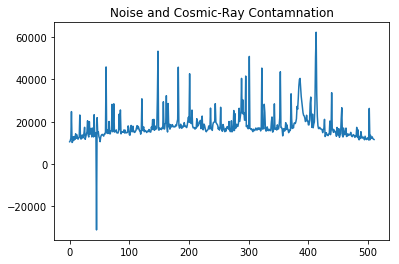

In [11]:
# another plot
#plt.figure()
#plt.plot(img[:, 300])

#profile = img.sum(axis=1)
#plt.figure()
#plt.plot(profile)

spectrum = img.sum(axis=0)
plt.figure()
plt.plot(spectrum)
plt.title('Noise and Cosmic-Ray Contamnation')

## Thursday 05/25/17

In the morning, Coley and I did not accomplish much because we continued to get the same errors as yesterday. Dr. Moustakas pip installed corner, so we were able to complete the Emcee tutorial. However, we are still stuck in terms of Prospector.

In the afternon, we started by wrapping up our work with Emcee. We worked with Dr. Moustakas on Prospector and figuring out what we need to look at closer. For the rest of the day, we started working on our new to do list.

To do:
* Learn about:
    * **kwargs
    * non-parametric SFH
    * maggies
    * tophat priors
* Look at the "fun part" and figure out which parts need to be done
* add zred to the obs file/dictionary. Is this step necessary?

## Friday 05/26/17

In the morning, I came in early and began working on the list of to do's Dr. Moustakas gave us yesterday. Then, Dr. Moustakas came in and he, Coley, and I worked on tyring to combine the Prospector tutorial and the interactive demo into one document that uses our data instead of the simulated data. After Dr. Moustakas left, Coley and I continued to work on the document, but we did not make it very far. After a while, we decided it was not the best use of our time and we moved on to learning about fsps, python fsps, likelihood, and posteriors. In the fsps Github page, Coley found a useful chat explaining zcontinuous and the different settings for it as well as a fixed parameter pmetals (https://github.com/dfm/python-fsps/issues/70). We also derived a non-parametric SFH and attempted to do a Taylor expansion on it. After, we calculated how much of the sky the Legacy Survey is going to observe (one-third). After that, I spent more time digging into fsps and python fsps.

**kwargs allows you to pass something you have not yet defined through a function. For example:

In [12]:
def readme(**kwargs):
    for name, value in kwargs.items(): # https://stackoverflow.com/questions/3394835/args-and-kwargs
        print( '{0} = {1}'.format(name, value)) # https://stackoverflow.com/questions/3394835/args-and-kwargs

In [13]:
readme(x = 10, hello = 'hola', beats = 'nasty')

x = 10
hello = hola
beats = nasty


Non-parametric Star Formation History (SFH) is a SFH that does not have a good fit to match it.


# Monday 05/29/17

Holiday! No work done.

# Tuesday 05/30/17

In the morning, Coley and I worked with Dr. Moustakas and made some good progress. Then we plotted blackbody curves and tried to add them togther to see if galaxies are also blackbodies (they're not). After lunch, Coley and I continued to work on Prospector until Dr. Moustakas came and gave us a mini lecture on how the mass of a dark matter halo is related the stellar mass and the efficiency of star formation. After, Coley and I worked for another half hour on star formation. Later that night, I watched a lecture on Frequentist and Bayesian Statistics.

# Wednesday 05/31/17

In the morning, Coley and I worked on Prospector, and then Dr. Moustakas asked us to work on his (workshop Astronomy at the Frontier). Later, we cleaned up the cells and tabbing and sent off our code to Ben, who made Prospector, to look at since we were stuck. After, I continued to work on the workshop.

# Thursday 06/01/17

Coley and I started out the day by fixing a couple of things in Prospector that Ben suggested, and then we worked more on the workshop. I made a new Google Form for the teachers who are coming to fill out to get more information from them and discussed it with Dr. Moustakas. Hopefully that will be sent out early next week.

In the afternoon, Coley and I made a few more of Ben's suggested changes, but we were still stuck, so I worked more on the workshop.

# Friday 06/02/17

In the morning, I came in early and worked a little bit on the workshop. Coley, Kevin, and I tried debugging Prospector, but with little success. In the afternoon, I worked on the workshop until Dr. Moustakas came in. Then, he, Coley, and I worked on debugging Prospector.

# Monday 06/05/17

In the morning, I came in and answered a few emails and updated our list of the teachers attending the workshop with a new email address. After, I opened up our Prospector notebook and tried to decipher Ben's email from Friday with Coley. Then I worked on the teacher workshop again until Dr. Moustakas came down around 2:20 and we began writing the python script.

# Tuesday 06/06/17

Coley was sick. I worked on the teacher workshop.

# Wednesday 06/07/17

In the morning, Coley, Dr. Moustakas, and I worked on the teacher workshop. Then, Dr. Moustakas left because Phineas broke his wrist. Coley and I contiued to work on the workshop.

# Wednesday 06/14/17

Today, we worked on the teacher workshop in the mroning and then Prospector in the afternoon. Our script is almost complete! We just have to debug a few more things.

# Monday 06/26/17

In [14]:
import pandas as pd
from scipy import stats, integrate

import seaborn as sns
sns.set(color_codes=True)

In [15]:
np.random.seed(sum(map(ord, "distributions")))

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


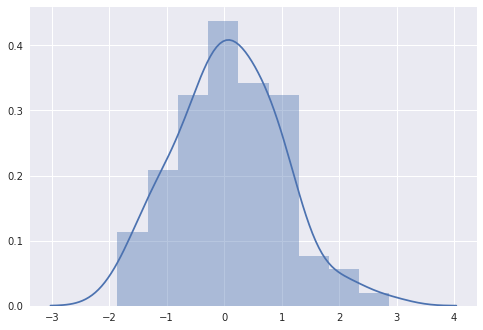

In [16]:
x = np.random.normal(size=100)
sns.distplot(x);

In [17]:
#sns.distplot(x, kde=False, rug=True);

In [18]:
#sns.distplot(x, bins=20, kde=False, rug=True);

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


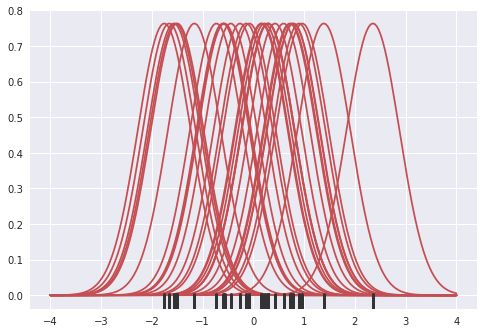

In [19]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);


/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


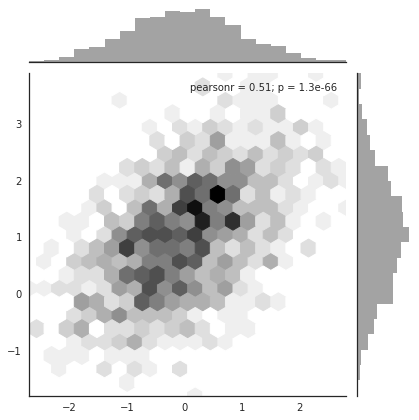

In [20]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


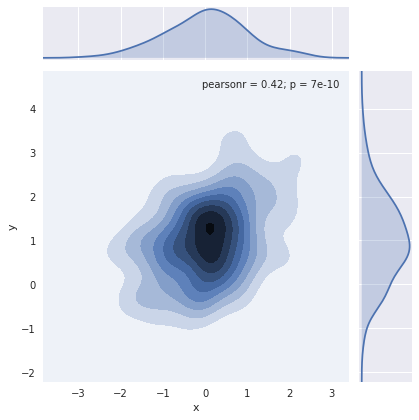

In [21]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

# Tuesday 06/27/17

$\log_{10}\frac{M_{\odot}}{M}$

$\log_{10}\,(M / M_{\odot})$

# Thursday 06/29/17

In [22]:
# Practice with astropy tables
from astropy.table import Table

In [24]:
# Fake data
a = [1, 3, 6]
b = [2.2, 3.4, 8.0]
c = ['x', 'y', 'z']

In [27]:
# Make the table
t = Table([a, b,c], names=('a', 'b', 'c'), meta={'name' : 'My Table'})
print(t)

 a   b   c 
--- --- ---
  1 2.2   x
  3 3.4   y
  6 8.0   z


In [29]:
# Here's another way
data_rows = [(1, 2.2, 'x'),
             (3, 3.4, 'y'),
             (6, 8.0, 'z')]
t = Table(rows=data_rows, names=('a', 'b', 'c'), meta={'name' : 'New Table'}, dtype=('i4', 'f8', 'S1'))
print(t)

 a   b   c 
--- --- ---
  1 2.2   x
  3 3.4   y
  6 8.0   z


In [30]:
# Fancy way to print it
t.show_in_notebook()

idx,a,b,c
0,1,2.2,x
1,3,3.4,y
2,6,8.0,z


In [34]:
# Open each HDF5 file 
# Hints: glob and //gather/wrapper
from glob import glob
#glob('./siena-astrophysics/research/redmapper/redmapper_sdssphot.*')
glob('*')

['learning-prospector.ipynb',
 'black-body.ipynb',
 'prospector-tutorial',
 'meg-summer-notebook.ipynb',
 'py4ast']

In [ ]:
# Pull out basic info + derived params
# isedfit, redshift, stellar mass, age, tau



# Write out file